## Internet Firewall Data classification

### 1. Data loading and Exploration

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler


In [2]:
arff_file = arff.loadarff('/Users/maksimnoskov/Documents/tsi_term2/ml_pa_project/Dry_Bean_Dataset.arff')
data = pd.DataFrame(arff_file[0])

In [3]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395.0,610.291,208.178117,173.888747,1.197191,0.549812,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,b'SEKER'
1,28734.0,638.018,200.524796,182.734419,1.097356,0.411785,29172.0,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,b'SEKER'
2,29380.0,624.110,212.826130,175.931143,1.209713,0.562727,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,b'SEKER'
3,30008.0,645.884,210.557999,182.516516,1.153638,0.498616,30724.0,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,b'SEKER'
4,30140.0,620.134,201.847882,190.279279,1.060798,0.333680,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,b'SEKER'


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  float64
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  float64
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [29]:
# Check for 0 values

(data == 0).sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRatio        0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [5]:
data.rename(columns={'AspectRation': 'AspectRatio'}, inplace=True)

Variable *Class* is my target variable. Checking how many classes do I have in my data:

In [6]:
data['Class'].value_counts()

Class
b'DERMASON'    3546
b'SIRA'        2636
b'SEKER'       2027
b'HOROZ'       1928
b'CALI'        1630
b'BARBUNYA'    1322
b'BOMBAY'       522
Name: count, dtype: int64

In [7]:
# I don't like the format of the values in the column Class. Decided to transform these values into str format

data['Class'] = data['Class'].str.decode('utf-8')

In [33]:
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


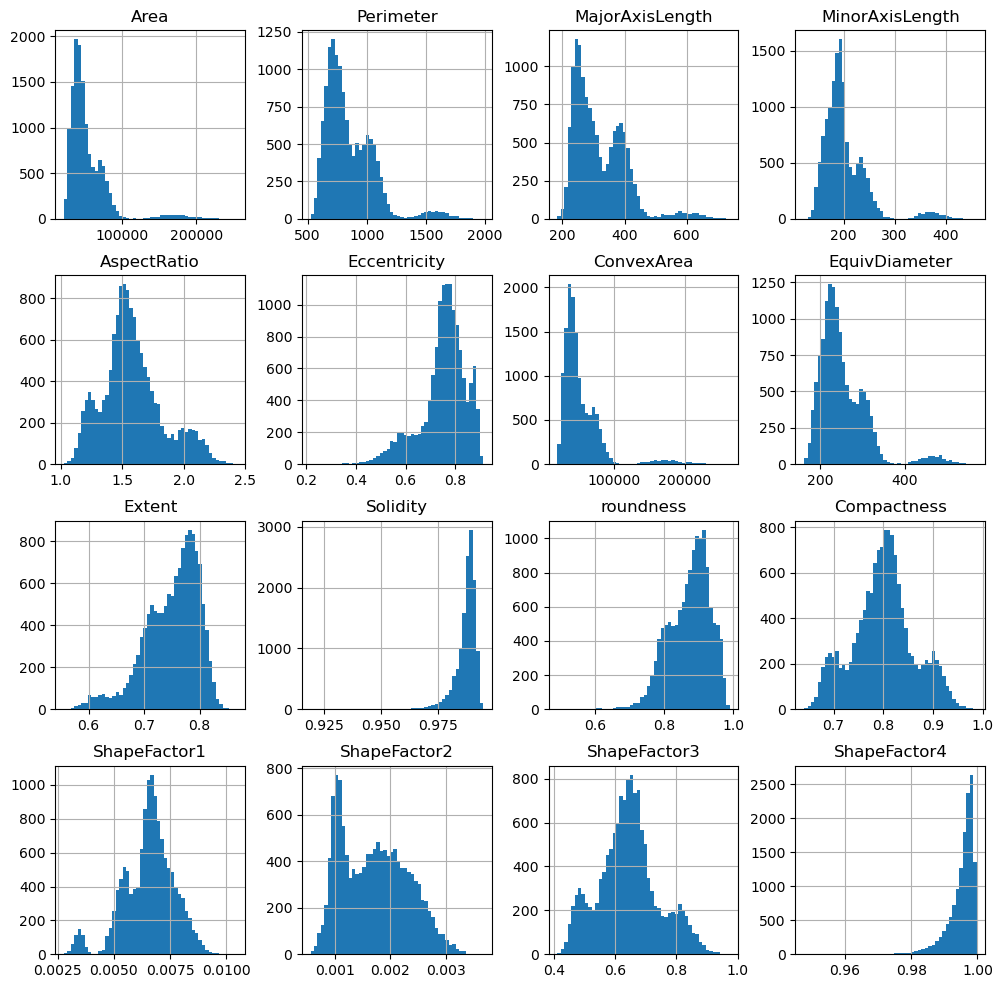

In [8]:
data.hist(bins=50, figsize=(12, 12))
plt.show()

Creating a density matrix (density plot)

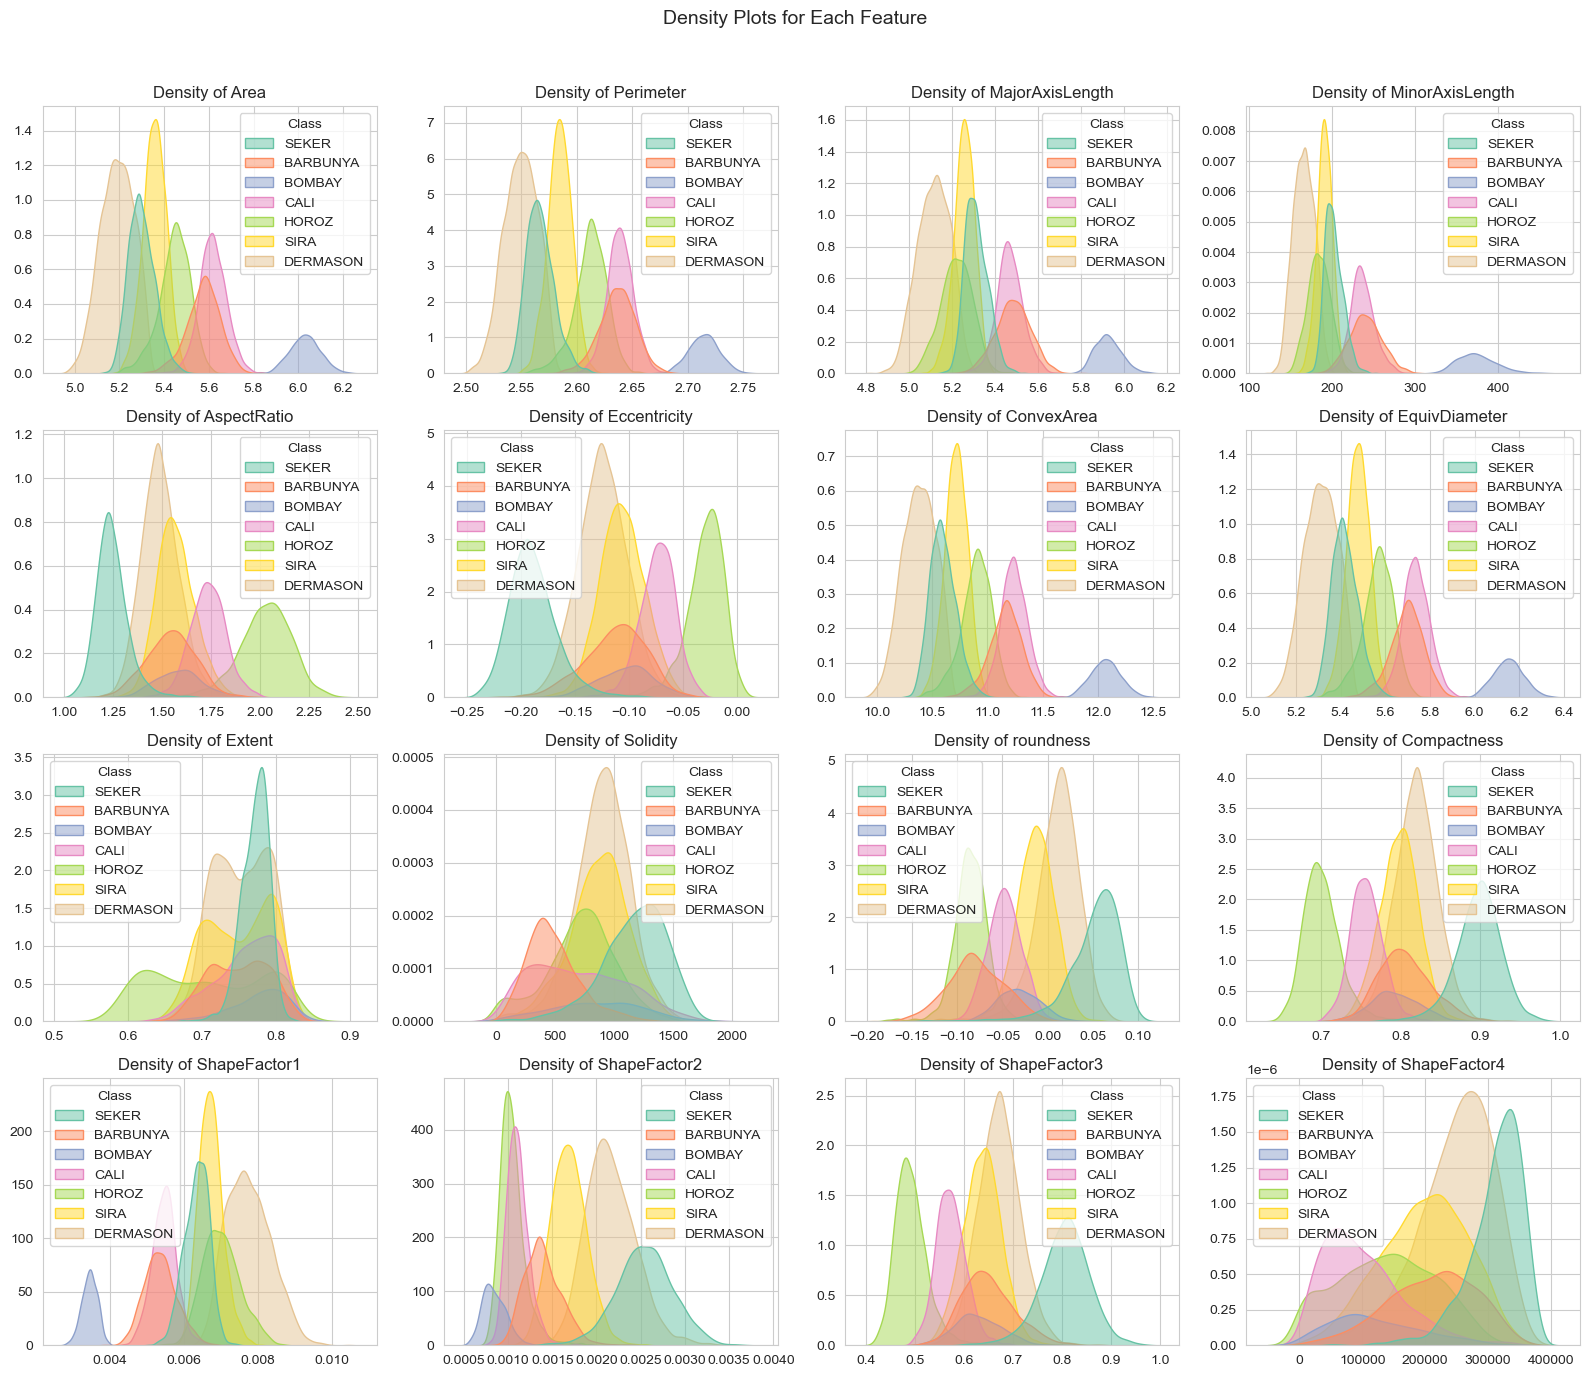

In [28]:
sns.set_style("whitegrid")

labels = data["Class"]
features = data.drop("Class", axis=1)

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 14))  # Adjust the figure size as needed
fig.suptitle('Density Plots for Each Feature', fontsize=14)

axes = axes.flatten()

for i, feature in enumerate(features.columns):
    sns.kdeplot(data=data, x=feature, hue="Class", fill=True, ax=axes[i], palette="Set2", alpha=0.5)
    axes[i].set_title(f'Density of {feature}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the rectangle in tight_layout
plt.show()

Splitting Dataset into training, validation, and test sets.

In [ ]:
# Split into training (80%) and test (20%) sets using Stratified Sampling

train_features, test_features, train_labels, test_labels = train_test_split(
    features, 
    labels, 
    test_size=0.20,
    random_state=42, 
    stratify=labels  # Ensures stratified sampling
)

In [ ]:
# Split training data into Training (90%) and Validation (10%) sets

train_features, val_features, train_labels, val_labels = train_test_split(
    train_features,
    train_labels,
    test_size=0.10,
    random_state=42,
    stratify=train_labels
)

Data transformation pipeline 

In [ ]:
def log_transform(x):
    return np.log(x)

log_transformer = FunctionTransformer(log_transform)

def boxcox_transform(x):
    x_positive = x + 0.1 
    x_transformed, _ = stats.boxcox(x_positive)
    return x_transformed

boxcox_transformer = FunctionTransformer(boxcox_transform)

log_columns = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 
               'ConvexArea', 'EquivDiameter']
boxcox_columns = ['Eccentricity', 'Solidity', 'roundness', 'ShapeFactor4']
standardize_columns = log_columns + boxcox_columns + ['AspectRatio', 'Extent', 'Compactness',
                                                      'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3']

preprocessor = ColumnTransformer(
    transformers=[
        ('log', log_transformer, log_columns),
        ('boxcox', boxcox_transformer, boxcox_columns),],
    remainder='passthrough')

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
])


Applying the Pipeline:
* Fit and transform tarin_features
* Transform val_features and test_features 

In [ ]:
pipeline.fit(train_features)
train_features_transformed = pipeline.transform(train_features)

In [ ]:
val_features_transformed = pipeline.transform(val_features)
test_features_transformed = pipeline.transform(test_features)

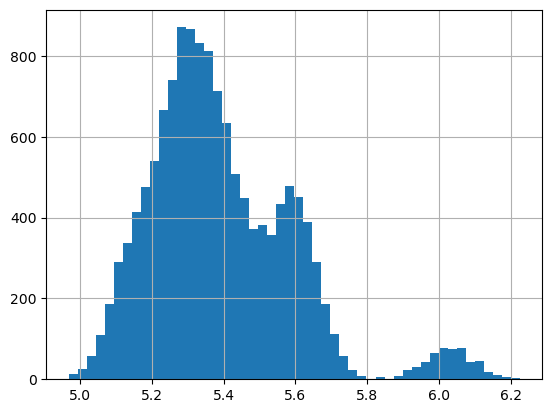

In [16]:
data['EquivDiameter'] = np.log(data['EquivDiameter'] + 1)  # Adding 1 to avoid log(0)
#data['Perimeter'] = np.sqrt(data['Perimeter'])

# Visualizing the transformed data to see the effect
data['Area'].hist(bins=50)
plt.show()

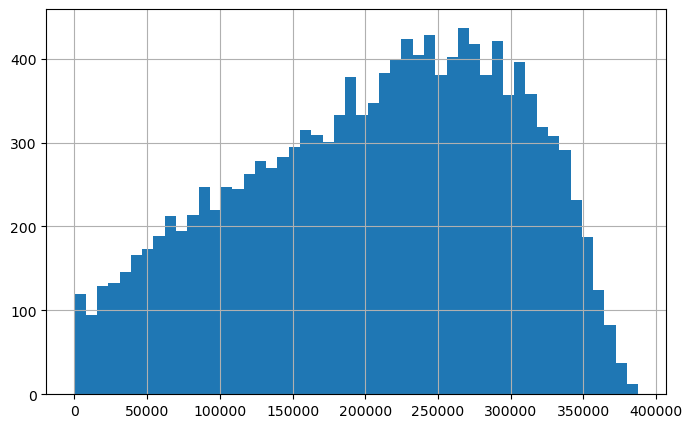

Fitted Lambda:  190.58046156159756


In [21]:
from scipy import stats

# Applying Box-Cox transformation
# Adding a small constant because Box-Cox transformation cannot handle zero values
data['ShapeFactor4'], fitted_lambda = stats.boxcox(data['ShapeFactor4'] + 0.1)

# Visualizing the transformed data
plt.figure(figsize=(8, 5))
pd.Series(data['ShapeFactor4']).hist(bins=50)
plt.show()

print("Fitted Lambda: ", fitted_lambda)

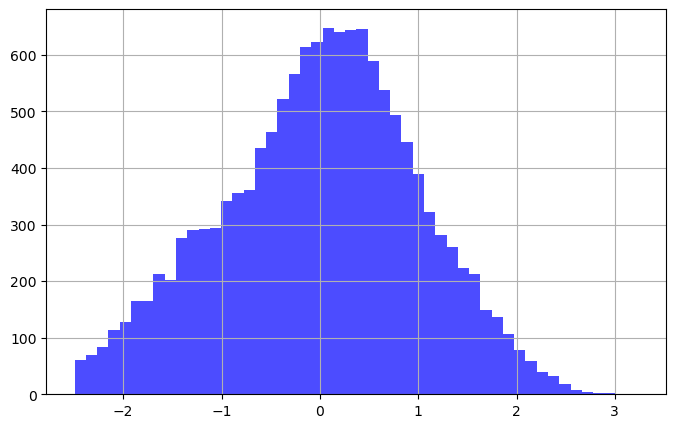

In [38]:
from sklearn.preprocessing import StandardScaler
from scipy import stats

scaler = StandardScaler()

solidity_scaled = scaler.fit_transform(data['Solidity'].values.reshape(-1, 1))

solidity_scaled = np.ravel(solidity_scaled)

plt.figure(figsize=(8, 5))
plt.hist(solidity_scaled, bins=50, color='blue', alpha=0.7)  # Alpha for transparency
plt.grid(True)
plt.show()

In [39]:
min_roundness = data['roundness'].min()
print("Minimum value before adding a constant:", min_roundness)

Minimum value before adding a constant: 0.4896182562412148


In [40]:
data['roundness'], fitted_lambda = stats.boxcox(data['roundness'] + 0.1)



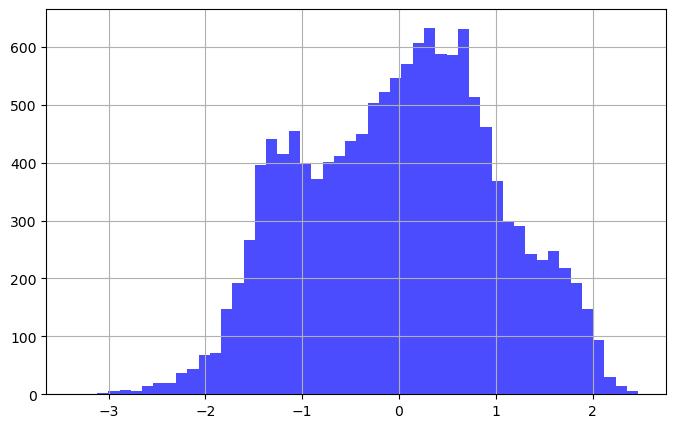

In [41]:
roundness_scaled = scaler.fit_transform(data['roundness'].values.reshape(-1, 1))

roundness_scaled = np.ravel(roundness_scaled)

plt.figure(figsize=(8, 5))
plt.hist(roundness_scaled, bins=50, color='blue', alpha=0.7)  # Alpha for transparency
plt.grid(True)
plt.show()